# Health Care Cost Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('../data/insurance.csv', sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Explore the dataset**

In [3]:
#clean the dataset
data = data.dropna()
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [4]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 0.98, 'The Count of Smokers of Different Genders')

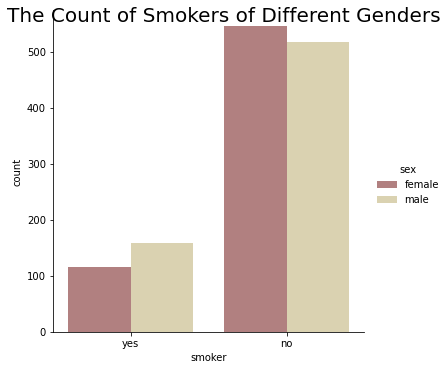

In [5]:
ax1 = sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)
ax1.fig.suptitle('The Count of Smokers of Different Genders', fontsize=20)

In [6]:
#Use LabelEncoder to Transform Ordinal Data
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [8]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<ipython-input-9-732f8ca97d43>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax2 = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


Text(0.5, 1.0, 'The Heatmap of All Features')

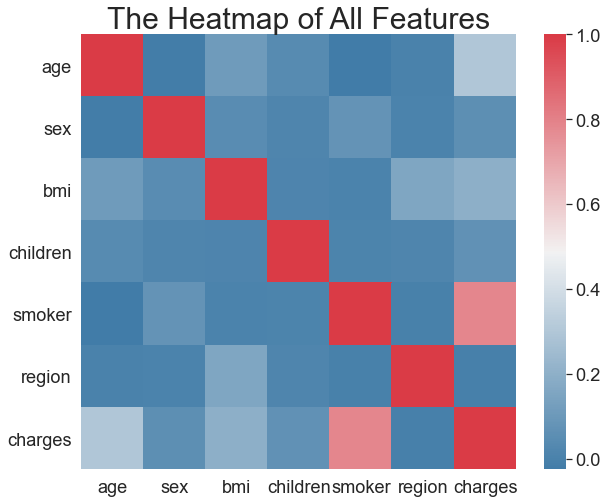

In [9]:
sns.set(font_scale=1.65)
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
ax2 = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)
ax2.set_title('The Heatmap of All Features', fontsize=30)

Text(0.5, 0.98, 'The Scatter-Matrix of Age, Bmi and Charges')

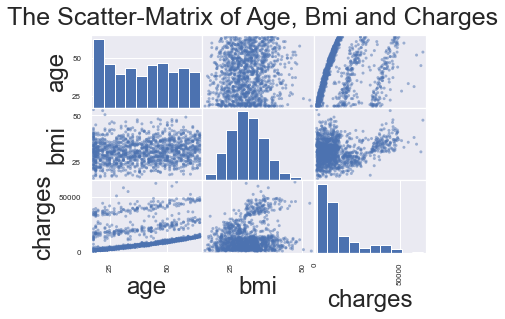

In [10]:
sns.set(font_scale=2)
pd.plotting.scatter_matrix(data[['age','bmi','charges']])
plt.suptitle('The Scatter-Matrix of Age, Bmi and Charges', fontsize=25)

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

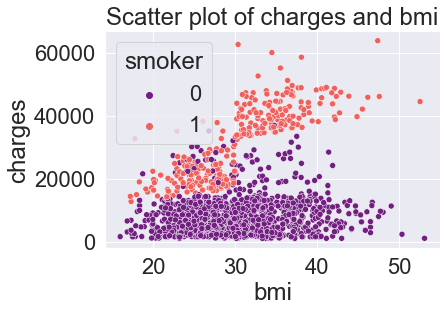

In [11]:
ax3 = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax3.set_title('Scatter plot of charges and bmi')

Text(0.5, 1.0, 'Scatter plot of charges and age')

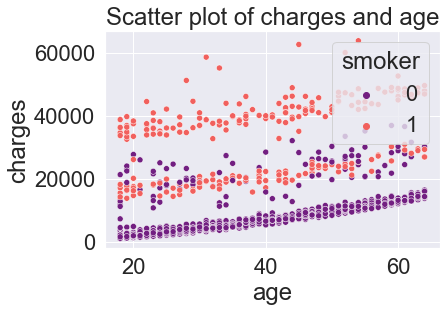

In [12]:
ax4 = sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker')
ax4.set_title('Scatter plot of charges and age')

In [13]:
def MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    nr_states = 10
    test_scores = np.zeros(nr_states)
    final_models = []

    # loop through the different random states
    for i in range(nr_states):
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        pipe = make_pipeline(preprocessor,ML_algo)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'r2',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)
        final_models.append(grid)
        # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = r2_score(y_test,y_test_pred)
        best_models = grid.best_params_
 
    return best_models, test_scores, grid

In [14]:
X = data.drop(['charges'], axis = 1)
y = data['charges']
ftr_names = X.columns
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = ['sex','smoker','region'] 
ordinal_cats = [[0,1],[0,1],[0,1, 2,3]]
minmax_ftrs = ['age','bmi','children']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

**Lasso**

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
ML_algo = Lasso()
param_grid = {'lasso__alpha':np.logspace(-7,0,29),
              'lasso__max_iter':[10000000]}
scores = []
bestmodels = []
grids = []
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits
Fitting 4 folds for each of 29 candidates, totalling 116 fits


({'lasso__alpha': 1.0, 'lasso__max_iter': 10000000},
 array([0.79981831, 0.78331308, 0.7699009 , 0.73921812, 0.7696676 ,
        0.70584151, 0.73485638, 0.72683925, 0.73169052, 0.76793889]))

**Ridge**

In [16]:
from sklearn.linear_model import Ridge
ML_algo = Ridge()
param_grid = {'ridge__alpha':np.logspace(-10,0,51)}
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits


({'ridge__alpha': 1.0},
 array([0.79983809, 0.78325824, 0.76965803, 0.73912995, 0.76950322,
        0.70631849, 0.73467716, 0.72666814, 0.73178359, 0.76834285]))

**ElasticNet**

In [17]:
from sklearn.linear_model import ElasticNet
ML_algo = ElasticNet()
param_grid = {'elasticnet__alpha':np.logspace(-10,0,51)}
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits
Fitting 4 folds for each of 51 candidates, totalling 204 fits


({'elasticnet__alpha': 0.002511886431509582},
 array([0.7998254 , 0.7832232 , 0.76955512, 0.7390891 , 0.76943049,
        0.70673353, 0.73460534, 0.7265854 , 0.73179522, 0.76846727]))

**RF**

In [18]:
from sklearn.ensemble import RandomForestRegressor
ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1, 2, 3, 4, 5],
              'randomforestregressor__n_estimators': [20,25,30,35,40]
              } 
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits
Fitting 4 folds for each of 25 candidates, totalling 100 fits


({'randomforestregressor__max_depth': 4,
  'randomforestregressor__n_estimators': 30},
 array([0.89702373, 0.87304846, 0.87866617, 0.86693315, 0.86303224,
        0.84801573, 0.84927814, 0.82131749, 0.85321792, 0.87622137]))

**SVR**

In [19]:
from sklearn.svm import SVR
ML_algo = SVR()
param_grid={'svr__C': [0.1, 1, 10, 100, 1000],
            'svr__gamma': [1,0.1,0.01,0.001]}
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits


({'svr__C': 1000, 'svr__gamma': 1},
 array([0.67691883, 0.68938613, 0.67709394, 0.63689979, 0.63754267,
        0.68487736, 0.63631438, 0.61070217, 0.64861273, 0.6808664 ]))

**KNN**

In [20]:
from sklearn.neighbors import KNeighborsRegressor
ML_algo = KNeighborsRegressor()
param_grid={"kneighborsregressor__n_neighbors": [1, 10, 30, 50]}
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits
Fitting 4 folds for each of 4 candidates, totalling 16 fits


({'kneighborsregressor__n_neighbors': 10},
 array([0.79025128, 0.76002789, 0.80115627, 0.7477318 , 0.7871617 ,
        0.6927003 , 0.72762514, 0.73170389, 0.71909313, 0.75117891]))

**XGB**

In [21]:
import xgboost
ML_algo = xgboost.XGBRegressor()
param_grid = {"xgbregressor__learning_rate": [0.03,0.05,0.07],
              "xgbregressor__n_estimators": [500],
              "xgbregressor__min_child_weight": [5],
              "xgbregressor__max_depth": [2,3,4],
              "xgbregressor__colsample_bytree": [0.7],              
              "xgbregressor__subsample": [0.66]}
bestmodel, testscore, grid = MLpipe_KFold_R2(X, y, preprocessor, ML_algo, param_grid)
scores.append(testscore)
bestmodels.append(bestmodel)
grids.append(grid)
bestmodel, testscore

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Fitting 4 folds for each of 9 candidates, totalling 36 fits


({'xgbregressor__colsample_bytree': 0.7,
  'xgbregressor__learning_rate': 0.03,
  'xgbregressor__max_depth': 2,
  'xgbregressor__min_child_weight': 5,
  'xgbregressor__n_estimators': 500,
  'xgbregressor__subsample': 0.66},
 array([0.89893417, 0.88071786, 0.88601082, 0.86406682, 0.8696042 ,
        0.84672077, 0.85207582, 0.83851778, 0.85596505, 0.88204141]))

**Evaluating**

Text(0.5, 1.0, 'R2 score of 7 Different Models')

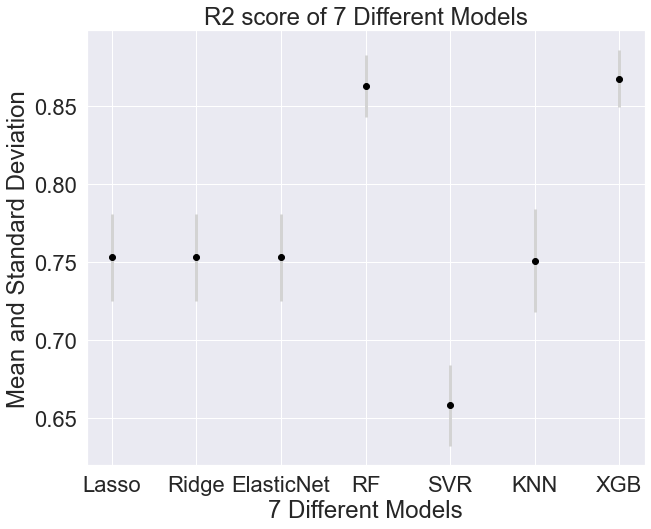

In [22]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
mean = []
std = []
xlabel = ['Lasso','Ridge','ElasticNet','RF','SVR','KNN','XGB']
for i in scores:
    mean.append(np.mean(i))
    std.append(np.std(i))
plt.errorbar(xlabel,mean,std, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
plt.ylabel('Mean and Standard Deviation')
plt.xlabel('7 Different Models')
plt.title('R2 score of 7 Different Models')

In [23]:
import pickle
grid = grids[6]
saved_model = "../results/XGB_model.sav"
XGB = pickle.dump(grid.best_estimator_[1], open(saved_model,'wb'))

In [24]:
modelAccuracy = []
baselineAccuracy = []
for i in range(50):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=3*i)
    ML_algo = pickle.load(open(saved_model, 'rb'))
    clf = Pipeline(steps=[('preprocessor', preprocessor)])
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    ML_algo.fit(X_train_prep,y_train)
    y_pred = ML_algo.predict(X_test_prep)
    r2score = r2_score(y_test,y_pred)
    modelAccuracy.append(r2score)

    base = LinearRegression()
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    base.fit(X_train_prep,y_train)
    y_pred = base.predict(X_test_prep)
    r2score = r2_score(y_test,y_pred)
    baselineAccuracy.append(r2score)

In [25]:
mean = [np.mean(modelAccuracy),np.mean(baselineAccuracy)]
std = [np.std(modelAccuracy),np.std(baselineAccuracy)]
print('XGB mean: {:.4f} \nXGB std: {:.4f}'
      .format(mean[0],std[0]))
print('Baseline mean: {:.4f} \nBaseline std: {:.4f}'
      .format(mean[1],std[1]))
print((mean[0]-mean[1])/std[1])
print((mean[0]-mean[1])/std[0])

XGB mean: 0.8591 
XGB std: 0.0276
Baseline mean: 0.7474 
Baseline std: 0.0335
3.3329497786558293
4.0401665309242984


In [26]:
nr_runs = 10
scores2 = np.zeros([len(ftr_names),nr_runs])
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores2[i] = acc_scores

shuffling age
   shuffled test score: 0.686 +/- 0.017
shuffling sex
   shuffled test score: 0.899 +/- 0.001
shuffling bmi
   shuffled test score: 0.621 +/- 0.041
shuffling children
   shuffled test score: 0.889 +/- 0.004
shuffling smoker
   shuffled test score: -0.53 +/- 0.1
shuffling region
   shuffled test score: 0.896 +/- 0.002


test score: 0.8998888240621047
[0.00621172 0.81074303 0.01166399 0.0725973  0.08313929 0.01564469]


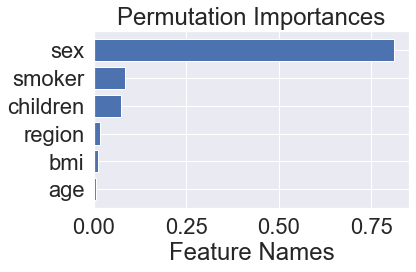

In [27]:
print('test score:',grid.score(X_test,y_test))
feature_importances = grid.best_estimator_[-1].feature_importances_
sorted_indcs = np.argsort(np.abs(feature_importances))
print(feature_importances)
plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(6),feature_importances[sorted_indcs[-6:]])
plt.yticks(np.arange(6),ftr_names[sorted_indcs[-6:]])
plt.xlabel('Feature Names')
plt.title('Permutation Importances')
plt.tight_layout()
plt.show()

In [28]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)

shap_values = explainer.shap_values(X_test_transformed)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [29]:
i = 6
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=ftr_names)

In [30]:
i = 2
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=ftr_names)

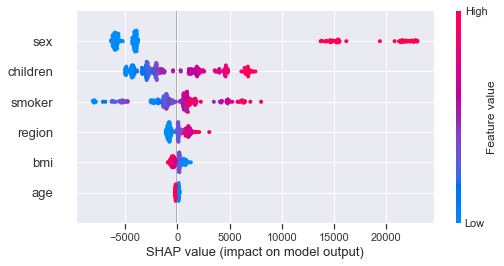

In [31]:
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=ftr_names)

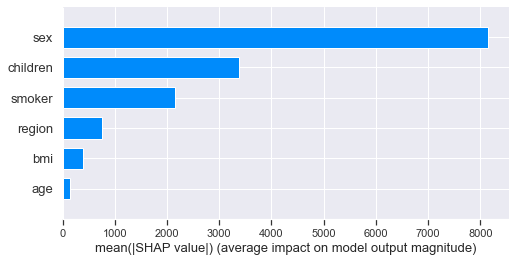

In [32]:
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=ftr_names, plot_type='bar')